In [86]:
# Standard Libraries
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

# Datasets
from sklearn.datasets import load_boston, load_diabetes

# Validation
from sklearn.model_selection import train_test_split

# Parallel Tools
import multiprocessing
from multiprocessing import Pool
from itertools import product

# Extra
from numpy import sign
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import time

# My stuff
from assignment3 import *

In [139]:
# Import the data we will be using
boston = load_boston()
print(boston['DESCR'])

data = boston.data
target = boston.target

n = data.shape[0]

# Scaled
scaler1 = StandardScaler()
dataScaled = scaler1.fit_transform(data)
scaler2 = StandardScaler()
yScaled = scaler2.fit_transform(target.reshape(-1,1))

# DF nicer for looking at things
bostonDF = pd.DataFrame(boston['data'],columns=boston['feature_names'])
bostonDF['target'] = boston['target']

bostonDFscaled = pd.DataFrame(dataScaled,columns=boston['feature_names'])
bostonDFscaled['target'] = boston['target']

# Categorical Data:
cat_labels = []#['CHAS']

bostonDF1 = bostonDF.drop(cat_labels,axis=1)
bostonDF1scaled = bostonDFscaled.drop(cat_labels,axis=1)

# transform to X and y to be used below
# Used unscaled for now, will scale later on. 
X = bostonDF.drop(['target'],axis=1).values
y = target

display(bostonDFscaled.head())
bostonDFscaled.describe()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,506.000000
mean,-5.616939e-17,6.319056e-17,-3.145486e-15,-2.106352e-17,2.752300e-15,-1.150770e-14,-1.137430e-15,7.582867e-16,5.616939e-17,5.616939e-17,-1.022283e-14,8.593916e-15,-5.897786e-16,22.532806
std,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,1.000990e+00,9.197104
min,-4.197819e-01,-4.877224e-01,-1.557842e+00,-2.725986e-01,-1.465882e+00,-3.880249e+00,-2.335437e+00,-1.267069e+00,-9.828429e-01,-1.313990e+00,-2.707379e+00,-3.907193e+00,-1.531127e+00,5.000000
25%,-4.109696e-01,-4.877224e-01,-8.676906e-01,-2.725986e-01,-9.130288e-01,-5.686303e-01,-8.374480e-01,-8.056878e-01,-6.379618e-01,-7.675760e-01,-4.880391e-01,2.050715e-01,-7.994200e-01,17.025000
50%,-3.906665e-01,-4.877224e-01,-2.110985e-01,-2.725986e-01,-1.442174e-01,-1.084655e-01,3.173816e-01,-2.793234e-01,-5.230014e-01,-4.646726e-01,2.748590e-01,3.811865e-01,-1.812536e-01,21.200000
75%,7.396560e-03,4.877224e-02,1.015999e+00,-2.725986e-01,5.986790e-01,4.827678e-01,9.067981e-01,6.623709e-01,1.661245e+00,1.530926e+00,8.065758e-01,4.336510e-01,6.030188e-01,25.000000
max,9.933931e+00,3.804234e+00,2.422565e+00,3.668398e+00,2.732346e+00,3.555044e+00,1.117494e+00,3.960518e+00,1.661245e+00,1.798194e+00,1.638828e+00,4.410519e-01,3.548771e+00,50.000000


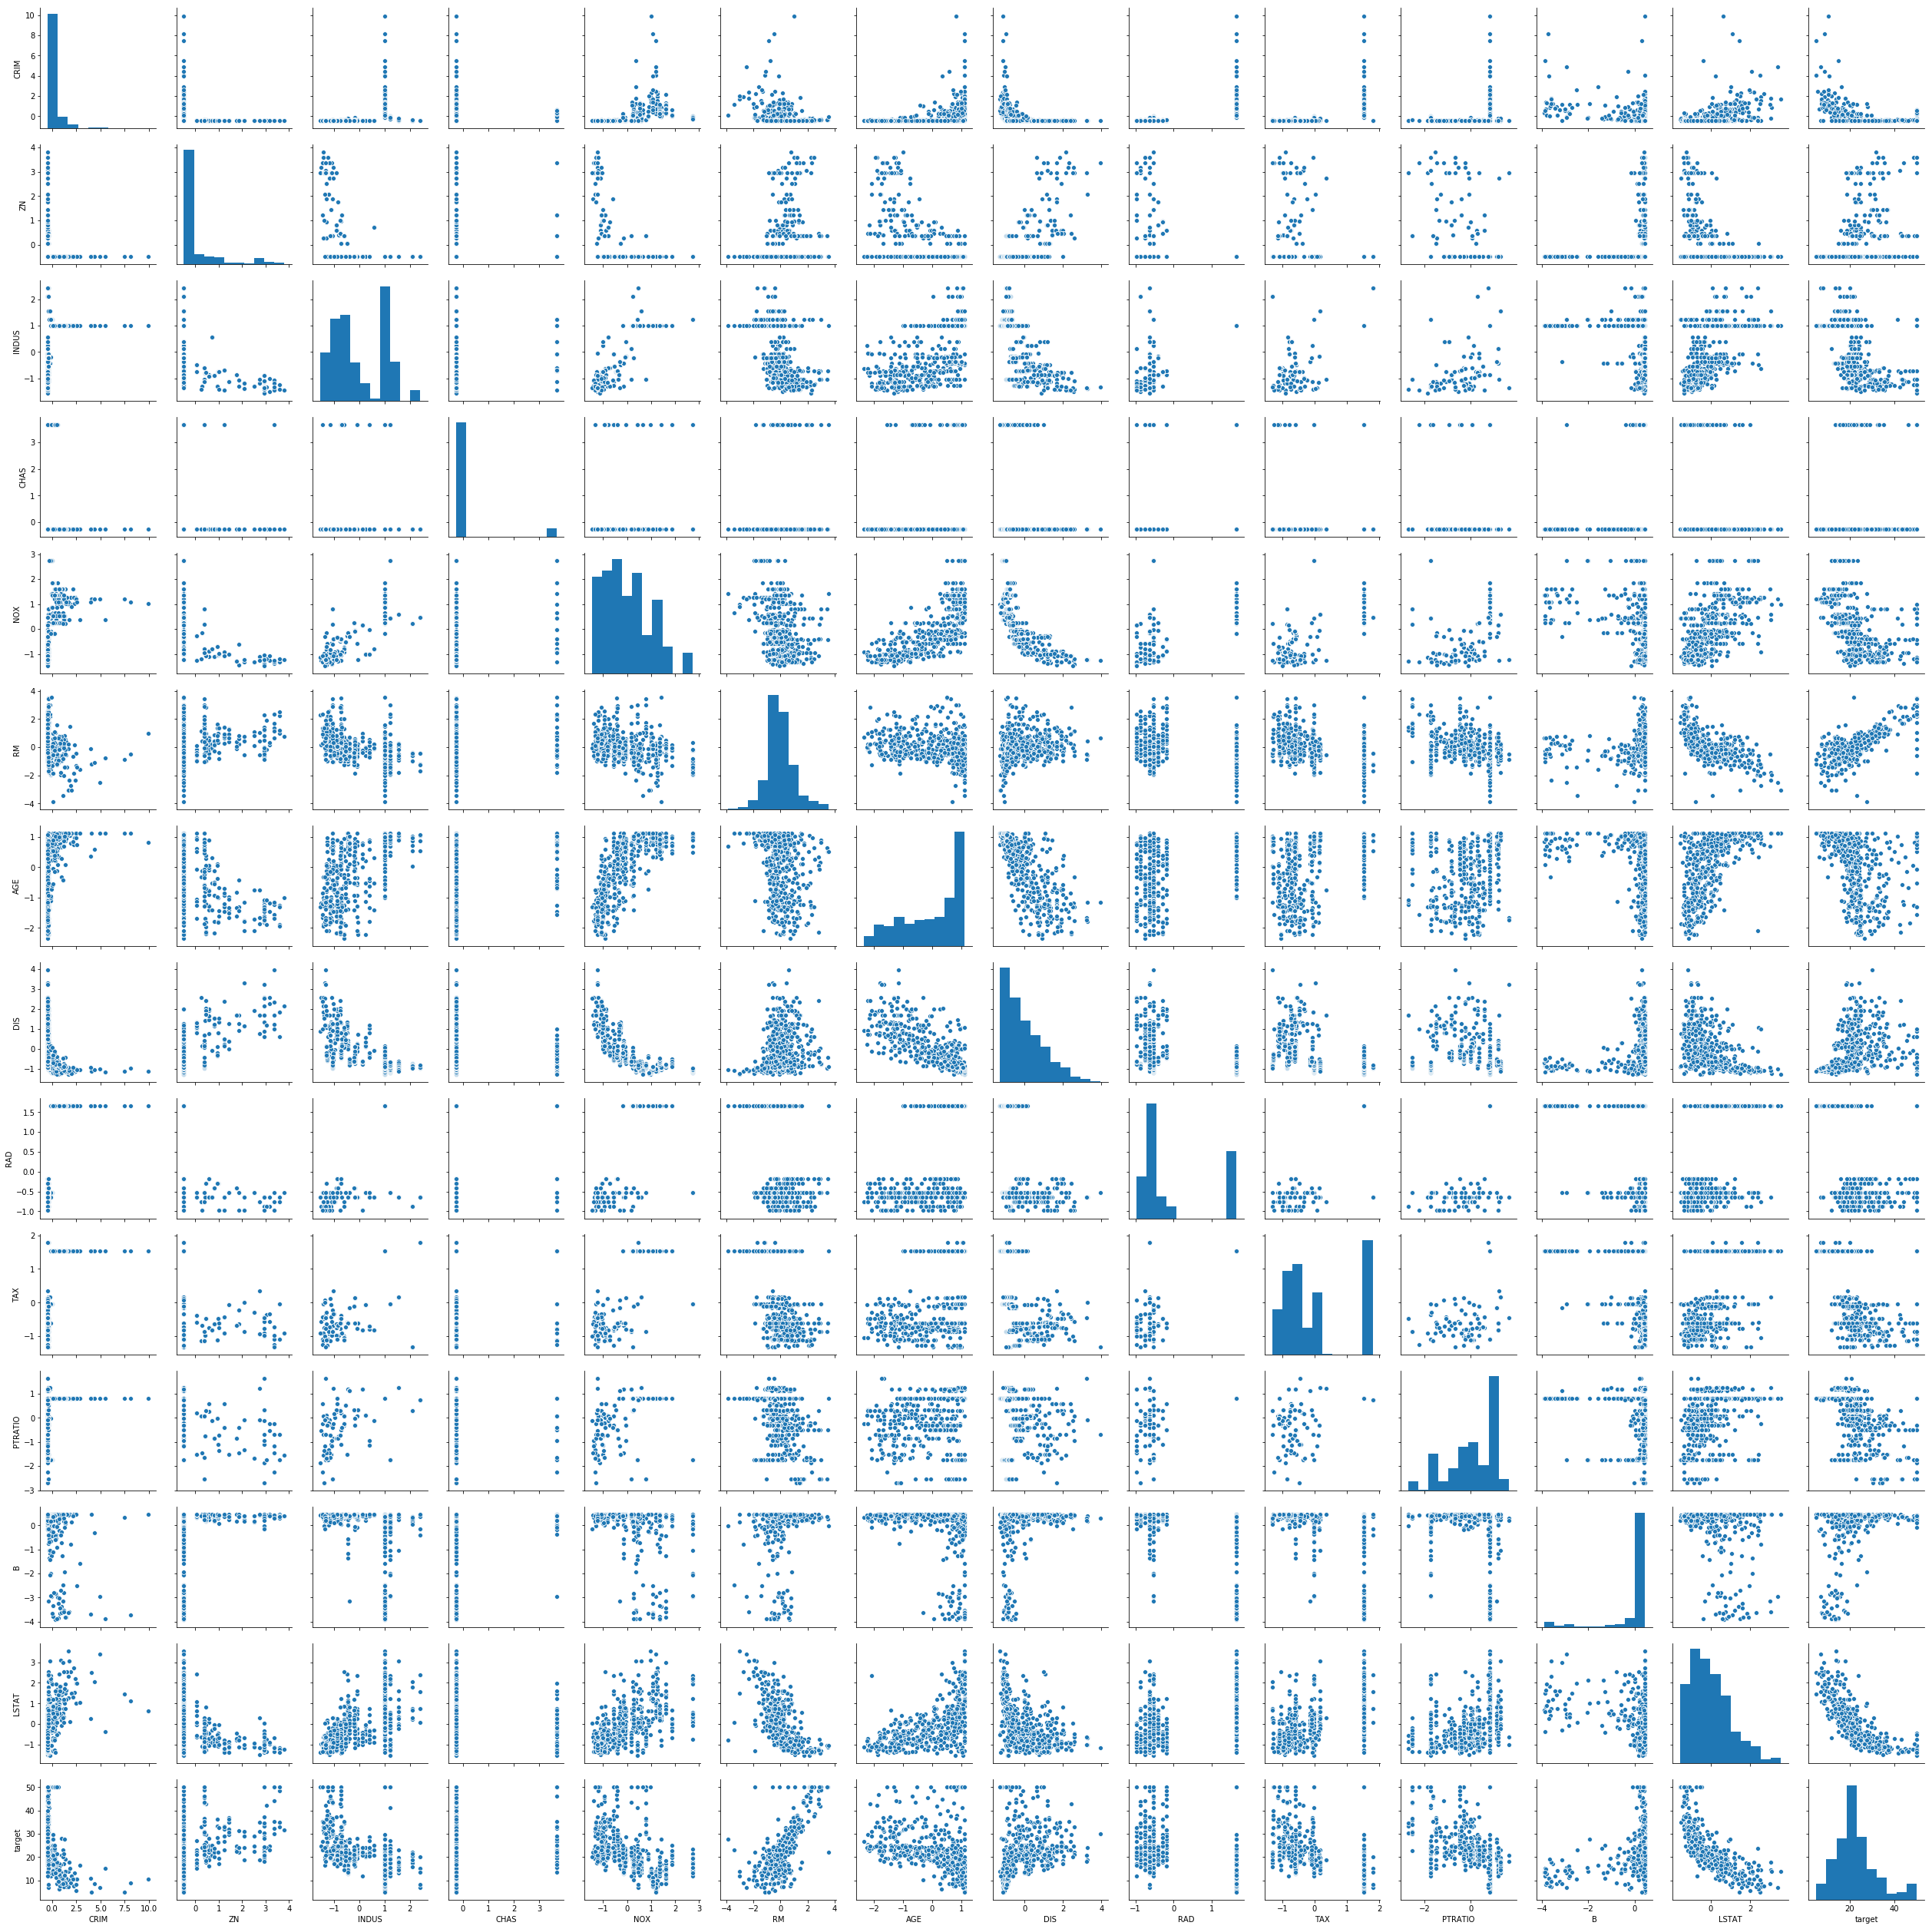

In [8]:
sns.pairplot(bostonDF1scaled)
plt.show()

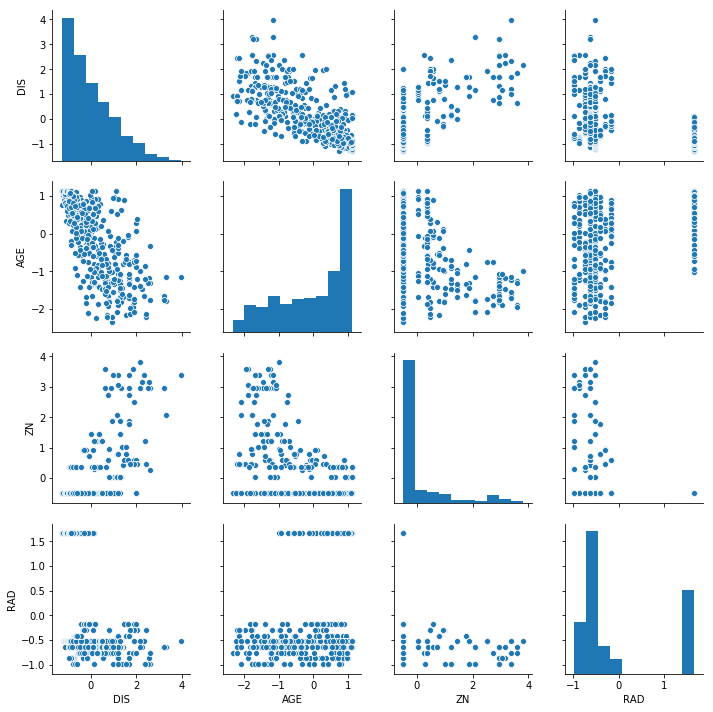

In [229]:
sns.pairplot(bostonDF1scaled[['DIS', 'AGE','ZN','RAD']])
plt.show()

In [232]:
# Split the data into a test and train set
np.random.seed(1)
x_train, x_test, y_train, y_test = train_test_split(X,yScaled,test_size = 0.3, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=42)
#x_train = X
#y_train = y
n = x_train.shape[0]
x_train.shape[0]

354

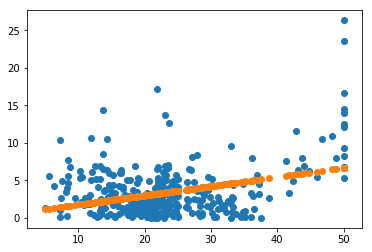

In [233]:
# Estimate the variances using OLS
n = x_train.shape[0]
n_test = x_test.shape[0]

y_train = y_train.reshape(-1,1)
x_with_bias = np.c_[np.ones(n),x_train]
beta_OLS = np.linalg.pinv(x_with_bias.T@x_with_bias)@x_with_bias.T@y_train

# Calculate Residuals
yhat = x_with_bias@beta_OLS
residuals = y_train-yhat
abs_resid = abs(residuals)

# Regress residuals onto original y's
y_with_bias = np.c_[np.ones(n),y_train]
beta_resids = np.linalg.pinv(y_with_bias.T@y_with_bias)@y_with_bias.T@abs_resid

# Create weights using residuals
resid_train = y_with_bias@beta_resids
resid_test = np.c_[np.ones(n_test),y_test]@beta_resids

plt.scatter(y_train,abs_resid)
plt.scatter(y_train,resid_train)
plt.show()

W_train = np.diag(1/np.power(resid_train.reshape(-1),2))
W_test = np.diag(1/np.power(resid_test.reshape(-1),2))

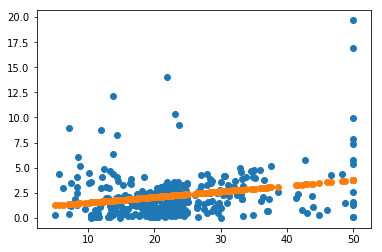

In [5]:
# Remake residuals, make sure they are stable?
# Calculate Residuals
yhat = y_with_bias@beta_resids
y_old = abs_resid
residuals = y_old-yhat
abs_resid = abs(residuals)

# Regress residuals onto original y's
y_with_bias = np.c_[np.ones(n),y_train]
beta_resids = np.linalg.pinv(y_with_bias.T@y_with_bias)@y_with_bias.T@abs_resid

# Create weights using residuals
resid_train = y_with_bias@beta_resids
resid_test = np.c_[np.ones(n_test),y_test]@beta_resids

plt.scatter(y_train,abs_resid)
plt.scatter(y_train,resid_train)
plt.show()

#W_train = np.diag(1/np.power(resid_train.reshape(-1),2))
#W_test = np.diag(1/np.power(resid_test.reshape(-1),2))

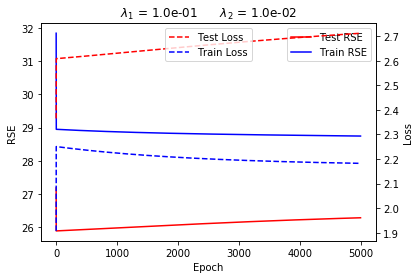

Number of 0-parameters: 0
Time to run: 8.757
Best Iteration: 4999

Intercept: 23.02

betas:
-18.67
10.05
-3.30
11.84
-22.36
29.16
-10.94
-26.13
5.81
-15.70
-30.42
13.97
-53.40


In [235]:
# Subgradient Descent
#W_train = np.eye(n)
lambda1 = 1e-1#0.5*n/5
lambda2 = 1e-2#0.5*n/5
test = SubGradientDescent(lambda1 = lambda1, lambda2 = lambda2, max_iter = 5000,learning_rate = 1e-4,scale=True,fit_intercept=True)
test.fit(x_train,y_train,W_train = W_train, x_test=x_test,y_test=y_test,W_test = W_test,plot_flag=True)
print('Number of 0-parameters: {:d}'.format(test.sparsity(atol=1e-4)))
print('Time to run: {:0.3f}'.format(test.timer))
print('Best Iteration:',test.iter_best)
print('\nIntercept: {:0.2f}'.format(test.intercept))
print('\nbetas:')
for beta in test.beta:
    print('{:0.2f}'.format(beta[0]))

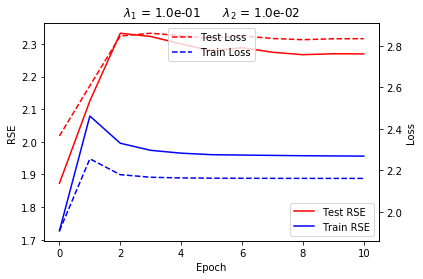

Number of 0-parameters: 0
Time to run: 0.054

Intercept: 23.02

betas:
-18.50
10.07
-3.15
12.81
-22.41
33.18
-11.15
-28.15
4.34
-13.45
-32.94
14.62
-56.98


In [236]:
# Coordinate Descent
test = CoordinateDescent(lambda1 = lambda1,lambda2 = lambda2, max_iter = 10, scale=True, fit_intercept=True)
test.fit(x_train,y_train,W_train = W_train, x_test=x_test,y_test=y_test,W_test = W_test,plot_flag=True)
print('Number of 0-parameters: {:d}'.format(test.sparsity(atol=1e-4)))
print('Time to run: {:0.3f}'.format(test.timer))
print('\nIntercept: {:0.2f}'.format(test.intercept))
print('\nbetas:')
for beta in test.beta:
    print('{:0.2f}'.format(beta[0]))

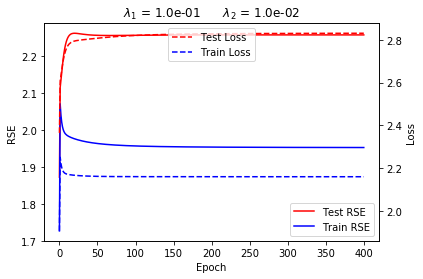

Number of 0-parameters: 0
Time to run: 0.570

Intercept: 23.02

betas:
-18.55
10.17
-2.91
12.79
-22.96
33.03
-10.94
-28.36
5.42
-14.27
-33.18
14.63
-57.10


In [237]:
# Proximal Gradient Descent
#W_train = np.eye(n)
n = x_train.shape[0]
ntest = x_test.shape[0]
#lambda1 = 1e-2#0.5*n
#lambda2 = 1e-2#0.5*n
test = ProximalDescent(lambda1 = lambda1, lambda2 = lambda2, max_iter = 400,learning_rate = 1e-1,scale=True,fit_intercept=True)
test.fit(x_train,y_train,W_train = W_train, x_test=x_test,y_test=y_test,W_test = W_test,plot_flag=True)
#print('Test RSE : {:0.2f}'.format(test.RSE(test.scaler.transform(x_test)/np.sqrt(n),y_test-test.intercept,W_test)[0][0]))
#print('Train RSE : {:0.2f}'.format(test.RSE(test.scaler.transform(x_train)/np.sqrt(n),y_train-test.intercept,W_train)[0][0]))
print('Number of 0-parameters: {:d}'.format(test.sparsity(atol=1e-4)))
print('Time to run: {:0.3f}'.format(test.timer))
print('\nIntercept: {:0.2f}'.format(test.intercept))
print('\nbetas:')
for beta in test.beta:
    print('{:0.2f}'.format(beta[0]))

In [10]:
results_dict = {"$\lambda_1$":[],
                "$\lambda_2$":[],
                "SGD time":[],
                "CD time":[],
                "PGD time":[],
                "SGD loss":[],
                "CD loss":[],
                "PGD loss":[],
                "SGD sparsity":[],
                "CD sparsity":[],
                "PGD sparsity":[],
               }
lambda1_list = [0.01,0.03,0.1,0.3,1,3,10,30,100,300]
lambda2_list = [0.01,0.03,0.1,0.3,1,3,10,30,100,300]

for lambda1 in lambda1_list:
    for lambda2 in lambda2_list:
        sgd = SubGradientDescent(lambda1 = lambda1, lambda2 = lambda2, max_iter = 2000,learning_rate = 1e-3,scale=True,fit_intercept=True)
        cd = CoordinateDescent(lambda1 = lambda1,lambda2 = lambda2, max_iter = 10, scale=True, fit_intercept=True)
        pgd = ProximalDescent(lambda1 = lambda1, lambda2 = lambda2, max_iter = 50,learning_rate = 1e-1,scale=True,fit_intercept=True)
        
        sgd.fit(x_train,y_train,W_train = W_train, x_test=x_test,y_test=y_test,W_test = W_test,plot_flag=False)
        cd.fit(x_train,y_train,W_train = W_train, x_test=x_test,y_test=y_test,W_test = W_test,plot_flag=False)
        pgd.fit(x_train,y_train,W_train = W_train, x_test=x_test,y_test=y_test,W_test = W_test,plot_flag=False)
        
        results_dict["$\lambda_1$"].append(lambda1)
        results_dict["$\lambda_2$"].append(lambda2)
        results_dict["SGD time"].append(sgd.timer)
        results_dict["CD time"].append(cd.timer)
        results_dict["PGD time"].append(pgd.timer)
        results_dict["SGD loss"].append(sgd.loss(sgd.scaler.transform(x_test)/np.sqrt(n),y_test-sgd.intercept,W_test,sgd.beta)[0][0])
        results_dict["CD loss"].append(cd.loss(cd.scaler.transform(x_test)/np.sqrt(n),y_test-cd.intercept,W_test)[0][0])
        results_dict["PGD loss"].append(pgd.loss(pgd.scaler.transform(x_test)/np.sqrt(n),y_test-pgd.intercept,W_test)[0][0])
        results_dict["SGD sparsity"].append(sgd.sparsity())
        results_dict["CD sparsity"].append(cd.sparsity())
        results_dict["PGD sparsity"].append(pgd.sparsity())
        

In [11]:
resultsDF = pd.DataFrame(results_dict)
resultsDF.describe()

,$\lambda_1$,$\lambda_2$,SGD time,CD time,PGD time,SGD loss,CD loss,PGD loss,SGD sparsity,CD sparsity,PGD sparsity
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000
mean,44.444000,44.444000,1.787061,0.012782,0.034442,1783.855194,1772.404834,1772.873500,0.0,3.410000,3.260000
std,90.597015,90.597015,0.239227,0.003500,0.009588,750.802634,730.051072,730.717878,0.0,4.905357,4.856777
min,0.010000,0.010000,1.536902,0.009971,0.025930,454.354990,469.070177,462.532213,0.0,0.000000,0.000000
25%,0.100000,0.100000,1.631948,0.010970,0.028922,1068.030086,1072.532868,1070.995807,0.0,0.000000,0.000000
50%,2.000000,2.000000,1.716128,0.011967,0.030916,1876.741933,1956.702168,1956.627983,0.0,0.000000,0.000000
75%,30.000000,30.000000,1.870446,0.012966,0.036154,2357.489381,2282.789734,2282.789734,0.0,8.000000,6.000000
max,300.000000,300.000000,2.701973,0.030918,0.089759,2879.899500,2895.926943,2895.903511,0.0,12.000000,12.000000


In [ ]:
# Parallelize stuff

In [12]:
n_examples = W_train.shape[0]
W_train_1 = np.eye(n_examples)
W_train_1.shape
W_train.shape
W_train_2 = np.eye(100)

In [145]:
# 10 FOLD CV
# Define the grid space
n_steps = 30
l_min = 1e-2
l_max = 1e2
lambda1_list = np.logspace(np.log10(l_min),np.log10(l_max),n_steps)
lambda2_list = np.logspace(np.log10(l_min),np.log10(l_max),n_steps)
#n_steps = 11
#lambda1_list = [0.001,0.01,0.03,0.1,0.3,1,3,10,30,100,300]
#lambda2_list = [0.001,0.01,0.03,0.1,0.3,1,3,10,30,100,300]

# Initialize the DataSet object that contains the methods used for 10 fold CV
dataset = parallel.DataSet(x_train, y_train, W_train)
start = time.time()
if __name__ ==  '__main__': 
    num_processors = 4
    with Pool(processes = num_processors) as p:
        # Starmap lets you apply multiple variables all at once, with product iterating over all possible combinations
        output = p.starmap(dataset.get_loss,product(lambda1_list,lambda2_list))
end = time.time()
print(end-start)

777.0580866336823


66
[0.01887392 0.06723358 3.18538637]
900


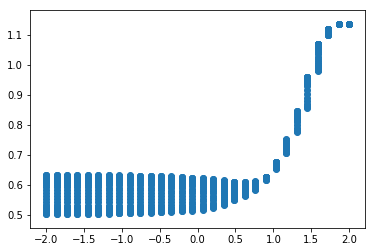

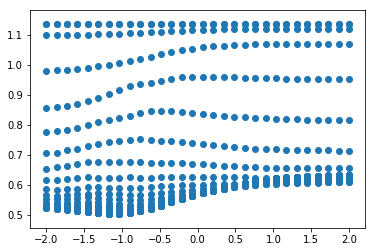

In [146]:
# Create plots for later use, display best solution. 
out2 = pd.DataFrame(output,columns=['lambda1','lambda2','loss'])
out1 = np.array(output)
best_ind = np.argmin(out1[:,2])
print(best_ind)
print('The best solution is: ')
print(out1[best_ind])
print(len(out1))
plt.scatter(np.log10(out1[:,0]),np.log10(out1[:,2]))
plt.show()
plt.scatter(np.log10(out1[:,1]),np.log10(out1[:,2]))
plt.show()

In [147]:
mesh0 = out1[:,0].reshape(n_steps,n_steps)
mesh1 = out1[:,1].reshape(n_steps,n_steps)
mesh2 = out1[:,2].reshape(n_steps,n_steps)

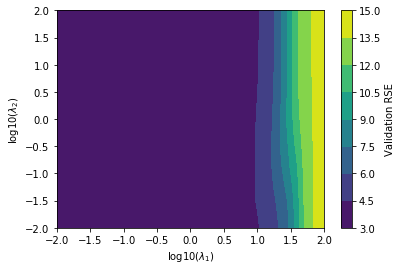

In [148]:
plt.contourf(np.log10(mesh0),np.log10(mesh1),mesh2)
cb = plt.colorbar()
cb.set_label('Validation RSE')
plt.xlabel('log10($\lambda_1$)')
plt.ylabel('log10($\lambda_2$)')
plt.show()

In [54]:
# Save grid search results
idx = 20
out2.iloc[30*idx:30*idx+30,:]
out2.to_csv('./p2_results/cv_grid_search.csv',index=False)

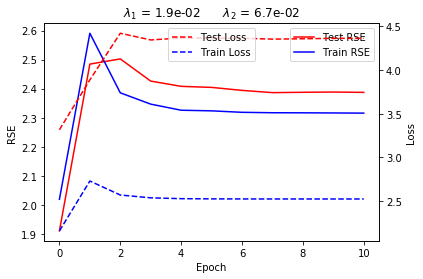

Test RSE : 2.39
Train RSE : 2.32
Number of 0-parameters: 0
Time to run: 0.076

Intercept: 22.53

betas:
-19.10
9.10
-13.31
12.51
-17.42
32.75
-14.30
-9.20
-3.05
-18.38
-29.26
12.25
-51.21


In [149]:
# Coordinate Descent on the best values 
n = x_train.shape[0]
lambda1_best = out1[best_ind][0]
lambda2_best = out1[best_ind][1]
test = CoordinateDescent(lambda1 = lambda1_best,lambda2 = lambda2_best, max_iter = 10, scale=True, fit_intercept=True)
test.fit(x_train,y_train,W_train = W_train, x_test=x_test,y_test=y_test,W_test = W_test,plot_flag=True)
print('Test RSE : {:0.2f}'.format(test.RSE(test.scaler.transform(x_test)/np.sqrt(n),y_test-test.intercept,W_test)[0][0]))
print('Train RSE : {:0.2f}'.format(test.RSE(test.scaler.transform(x_train)/np.sqrt(n),y_train-test.intercept,W_train)[0][0]))
print('Number of 0-parameters: {:d}'.format(test.sparsity(atol=1e-4)))
print('Time to run: {:0.3f}'.format(test.timer))
print('\nIntercept: {:0.2f}'.format(test.intercept))
print('\nbetas:')
for beta in test.beta:
    print('{:0.2f}'.format(beta[0]))

In [150]:
# BOOTSTRAPPING 
# produce n bootstrap samples
from sklearn.utils import resample

index_list = np.arange(x_train.shape[0])

sample_ids_list = []
for ii in range(20):
    sample_idx = resample(index_list)
    sample_ids_list.append((sample_idx, ii))

In [151]:
# This seems convoluted, but it seems to have worked so I'm rolling with it. 
# Loop over all possible combinations of lambda1, lambda2 , samples
# Once done, back out (using the sample_id tag) to regroup the samples and find the best lambdas
n_steps = 20
l_min = 1e-4
l_max = 1e0
lambda1_list = np.logspace(np.log10(l_min),np.log10(l_max),n_steps)
lambda2_list = np.logspace(np.log10(l_min),np.log10(l_max),n_steps)

dataset = parallel.DataSet(x_train, y_train, W_train)

start = time.time()
if __name__ ==  '__main__': 
    num_processors = 4
    with Pool(processes = num_processors) as p:
        # slightly different function being used this time, needs different inputs
        output = p.starmap(dataset.get_bootstrap_estimates,product(lambda1_list,lambda2_list, sample_ids_list))
end = time.time()
print(end-start)

7485.168358564377


In [152]:
best_dict = {}
# Back out of our massive for-loop, get best for each sample
for stuff in output:
    sample_id = stuff[3]
    if sample_id not in best_dict.keys():
        best_dict[sample_id] = {'l1': stuff[0],
                               'l2': stuff[1],
                               'best_rse': stuff[2]}
    else:
        if stuff[2]<best_dict[sample_id]['best_rse']:
            best_dict[sample_id] = {'l1': stuff[0],
                               'l2': stuff[1],
                               'best_rse': stuff[2]}

In [153]:
out = []
for key,value in best_dict.items():
    out.append([key, value['l1'], value['l2'], value['best_rse']])
    
out_df = pd.DataFrame(out, columns=['sample_id','Best $\lambda_1$','Best $\lambda_2$','Best RSE'])

display(out_df)
display(out_df.describe())

,sample_id,Best $\lambda_1$,Best $\lambda_2$,Best RSE
0,0,0.000100,0.000162,1.768287
1,1,0.000264,0.000100,2.057041
2,2,0.000695,0.000695,1.840097
3,3,0.000100,0.000100,1.993899
4,4,0.000162,0.000428,1.964345
5,5,0.001833,0.000162,2.236777
6,6,0.000695,0.000162,1.818379
7,7,0.001129,0.000162,1.937643
8,8,0.000162,0.000162,1.853665
9,9,0.001833,0.000100,1.936640


,sample_id,Best $\lambda_1$,Best $\lambda_2$,Best RSE
count,20.00000,20.000000,20.000000,20.000000
mean,9.50000,0.006289,0.000370,2.017562
std,5.91608,0.019887,0.000342,0.180743
min,0.00000,0.000100,0.000100,1.768287
25%,4.75000,0.000162,0.000162,1.878924
50%,9.50000,0.000695,0.000162,1.979122
75%,14.25000,0.001833,0.000695,2.129273
max,19.00000,0.088587,0.001129,2.470922


C:\Users\Aron\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


,sample_id,Best $\lambda_1$,Best $\lambda_2$,Best RSE
count,1.301030,1.301030,1.301030,1.301030
mean,0.977724,-2.201400,-3.432365,0.304827
std,0.772034,-1.701421,-3.465437,-0.742939
min,-inf,-4.000000,-4.000000,0.247553
25%,0.676694,-3.789474,-3.789474,0.273909
50%,0.977724,-3.157895,-3.789474,0.296473
75%,1.153815,-2.736842,-3.157895,0.328231
max,1.278754,-1.052632,-2.947368,0.392859


In [ ]:
# Save bootstrap results 
out_df.to_csv('./p2_results/bootstrap_statistics.csv',index=False)

In [225]:
# Produce Coefficient Paths
# best lambdas:
lambda1_best = 0.005
lambda2_best = 20#0.002

# each path should have a sparsity count up top as well. so for each run, we need lambda1, lambda2, sparsity, betas
# we'll take log steps
n_steps = 30
l_min = 3#1e-2
l_max = 1e2
lambda1_list = np.logspace(np.log10(l_min),np.log10(l_max),n_steps)

columns_list = ['$\lambda_1$', 'sparsity']
results_list = []
for ii in range(x_train.shape[1]):
    columns_list.append('$\\beta$'+str(ii))
    
for lambda1 in lambda1_list:
    test = CoordinateDescent(lambda1 = lambda1,lambda2 = lambda2_best, max_iter = 10, scale=True, fit_intercept=True)
    test.fit(x_train,y_train,W_train = W_train, x_test=x_test,y_test=y_test,W_test = W_test,plot_flag=False)
    sparsity = test.sparsity(atol=1e-4)
    betas = test.beta
    results = [lambda1, sparsity]
    for beta in betas:
        results.append(beta[0])
    results_list.append(results)

results_df = pd.DataFrame(results_list,columns=columns_list)
results_df

,$\lambda_1$,sparsity,$\beta$0,$\beta$1,$\beta$2,$\beta$3,$\beta$4,$\beta$5,$\beta$6,$\beta$7,$\beta$8,$\beta$9,$\beta$10,$\beta$11,$\beta$12
0,3.000000,0,-19.703352,7.045237,-13.632690,2.474984,-14.216276,11.405460,-11.784312,10.808013,-15.955201,-16.901743,-10.726774,11.273846,-22.451154
1,3.385590,0,-19.514347,6.848942,-13.440645,2.274426,-14.024585,11.208830,-11.590775,10.615303,-15.764894,-16.711642,-10.531221,11.080017,-22.261259
2,3.820739,0,-19.301050,6.627418,-13.223916,2.048090,-13.808256,10.986926,-11.372364,10.397824,-15.550127,-16.497107,-10.310533,10.861275,-22.046957
3,4.311818,0,-19.060337,6.377421,-12.979332,1.792663,-13.564122,10.736502,-11.125880,10.152392,-15.307756,-16.254997,-10.061481,10.614419,-21.805111
4,4.866016,0,-18.788686,6.095293,-12.703310,1.504406,-13.288610,10.453890,-10.847716,9.875416,-15.034233,-15.981770,-9.780417,10.335833,-21.532181
5,5.491444,0,-18.482119,5.776902,-12.391812,1.179100,-12.977686,10.134954,-10.533799,9.562839,-14.725554,-15.673424,-9.463229,10.021442,-21.224171
6,6.197259,0,-18.136149,5.417588,-12.040277,0.811982,-12.626799,9.775026,-10.179535,9.210087,-14.377200,-15.325447,-9.105273,9.666641,-20.876572
7,6.993791,0,-17.745712,5.012092,-11.643560,0.397678,-12.230813,9.368835,-9.779737,8.811996,-13.984073,-14.932744,-8.701308,9.266238,-20.484296
8,7.892703,1,-17.305024,4.554474,-11.195839,0.000000,-11.783947,8.910397,-9.328547,8.362741,-13.540383,-14.489525,-8.245362,8.814317,-20.041537
9,8.907151,1,-16.807259,4.038009,-10.690492,0.000000,-11.279750,8.392775,-8.819329,7.855766,-13.039448,-13.989063,-7.730425,8.303957,-19.541455


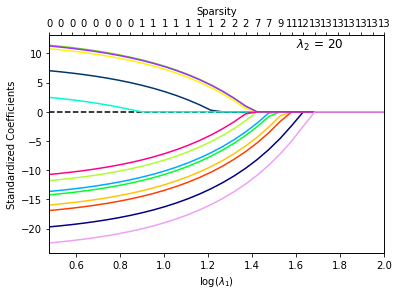

In [228]:
# Make the plot
NUM_COLORS = 13

cm = plt.get_cmap('gist_ncar')
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_prop_cycle(color=[cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)])

labels = boston['feature_names']

plt.axhline(y=0, color='k',linestyle='--')
plt.axvline(x=np.log10(lambda1_best), color='k',linestyle='--')
for ii in range(x_train.shape[1]):
    col_name = '$\\beta$'+str(ii)
    beta_list = results_df[col_name].values
    beta_standard = beta_list/np.sum(beta_list)
    plt.plot(np.log10(lambda1_list), beta_list.ravel(), label = labels[ii])

plt.annotate('$\lambda_2$ = {:1.3g}'.format(lambda2_best),(1.6, 11),fontsize='large')
    
plt.xlabel('$\log(\lambda_1)$')
plt.ylabel('Standardized Coefficients')
plt.xlim(np.log10([lambda1_list[0],lambda1_list[-1]]))
#plt.legend(ncol = 4)
#plt.title('Coefficient Paths')
ax2 = ax.twiny()
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(np.log10(lambda1_list))
ax2.set_xticklabels(results_df['sparsity'].values)
ax2.set_xlabel('Sparsity')

plt.show()